In [1]:
import numpy as np 
import matplotlib.pylab as plt 

plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Palatino']})
fontSize = 15

### Load Covariance Matrix

In [2]:
bands_EE_to_use = np.array([0, 1, 1, 1, 1, 0, 0])

In [3]:
cov = np.loadtxt('../data_for_likelihood/3zbins/covariance_all_z_EE.dat')

In [4]:
index = np.where(np.tile(bands_EE_to_use, 6) == 1)[0]
cov   = cov[np.ix_(index, index)]
std_ = np.split(np.sqrt(np.diag(cov)), 6)

In [5]:
Nele   = 24
newCov = np.zeros((Nele, Nele))

for i in range(Nele):
	for j in range(Nele):
		newCov[i,j] = cov[i,j]/np.sqrt(cov[i,i]*cov[j,j])

In [6]:
recLab = []
recZ   = []
for i in range(3):
    for j in range(i+1):
        lab = r'$\mathcal{C}^{\textrm{E}\textrm{E}}_{\ell,\,'+str(i+1)+str(j+1)+'}$'
        labz = r'$z'+str(i+1)+'\\times z'+str(j+1)+'$'
        recLab.append(lab)
        recZ.append(labz)

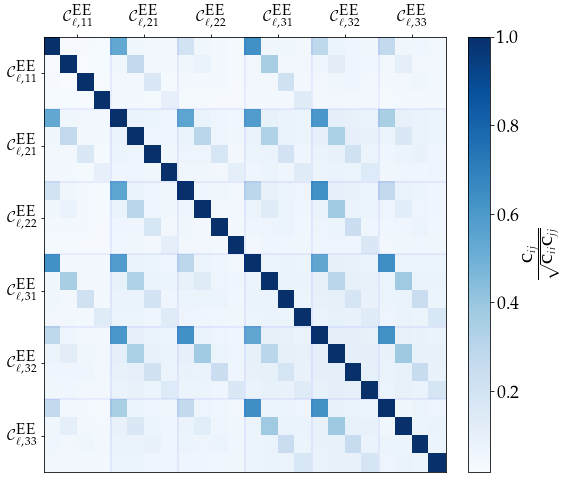

In [7]:
fig, ax = plt.subplots(figsize = (8,8))
column_labels = recLab
row_labels = recLab
heatmap = ax.pcolor(newCov, cmap=plt.cm.Blues)
cbar = plt.colorbar(heatmap, fraction = 0.05)#, format=ticker.FuncFormatter(fmt)
#add_colorbar(contour)
cbar.set_label(r'$\frac{\mathbf{C}_{ij}}{\sqrt{\mathbf{C}_{ii}\mathbf{C}_{jj}}}$',size=18)
cbar.ax.tick_params(labelsize=18) 
# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(0, newCov.shape[1], 4) + 2, minor=False)
ax.set_yticks(np.arange(0, newCov.shape[0], 4) + 2, minor=False)

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()
for i in range(5):
    ax.axhline((i+1)*4, lw = 0.1, c='b')
    ax.axvline((i+1)*4, lw = 0.1, c='b')
ax.set_xticklabels(column_labels, minor=False, fontsize=fontSize)
ax.set_yticklabels(row_labels, minor=False, fontsize=fontSize)
# plt.savefig('/Users/Harry/Desktop/kids_covariance.pdf', bbox_inches='tight')
plt.show()

### Bandpowers

In [8]:
import os
collect_bp_EE_in_zbins = []
for zbin1 in range(3):
    for zbin2 in range(zbin1 + 1): #self.nzbins):
        # zbin2 first in fname!
        fname_EE = os.path.join('../data_for_likelihood/3zbins/band_powers_EE_z{:}xz{:}.dat'.format(zbin1 + 1, zbin2 + 1))
        extracted_band_powers_EE = np.loadtxt(fname_EE)
        collect_bp_EE_in_zbins.append(extracted_band_powers_EE[bands_EE_to_use == 1])

### $\ell$ - Multipoles

In [9]:
ell_min = np.array([76, 221, 421, 671])
ell_max = np.array([220, 420, 670, 1310])
ell_cen = 0.5*(ell_min + ell_max) 
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [10]:
def make_error_boxes(ax, xdata, ydata, std, facecolor='b', edgecolor='b', alpha=0.2):
    
    xerror = np.concatenate([[ell_cen - ell_min], [ell_max - ell_cen]], axis = 0)
    yerror = np.concatenate([[1*std], [1*std]])
    # Create list for all the error patches
    errorboxes = []

    # Loop over data points; create box from errors at each point
    for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T):
        rect = Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
        errorboxes.append(rect)

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha, edgecolor=edgecolor)

    # Add collection to axes
    ax.add_collection(pc)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.tick_params(axis = 'both', labelsize = fontSize)
    ax.set_ylim(1E-7, 5E-2)
    ax.set_xlim(min(ell_min), max(ell_max))

    # Plot errorbars
    #artists = ax.errorbar(xdata, ydata, xerr=xerror, yerr=yerror, fmt='None', ecolor='k')
    artists = ax.scatter(xdata, ydata, s = 5)

    return artists

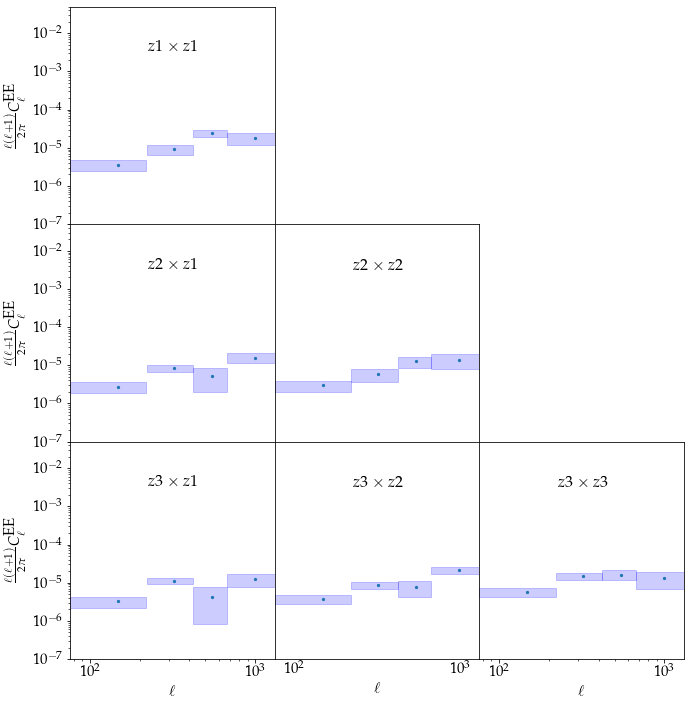

In [11]:
f, ax = plt.subplots(3, 3, sharex=True, sharey = True, figsize = (11, 12))

yLabel = r'$\frac{\ell(\ell + 1)}{2\pi}C_{\ell}^{\textrm{E}\textrm{E}}$'
xLabel = r'$\ell$'
#--------------------------------------------------------------------------------------------------------
make_error_boxes(ax[0,0], ell_cen, collect_bp_EE_in_zbins[0], std_[0])
ax[0,0].annotate(recZ[0], xy=(0.5, 0.8), xycoords='axes fraction', fontsize=16, horizontalalignment='center')
ax[0,0].set_ylabel(yLabel, fontsize=fontSize)

make_error_boxes(ax[1,0], ell_cen, collect_bp_EE_in_zbins[1], std_[1])
ax[1,0].annotate(recZ[1], xy=(0.5, 0.8), xycoords='axes fraction', fontsize=16, horizontalalignment='center')
ax[1,0].set_ylabel(yLabel, fontsize=fontSize)
   
    
make_error_boxes(ax[1,1], ell_cen, collect_bp_EE_in_zbins[2], std_[2])
ax[1,1].annotate(recZ[2], xy=(0.5, 0.8), xycoords='axes fraction', fontsize=16, horizontalalignment='center')
ax[1,1].tick_params(axis='both', which='both', length=0)
 

make_error_boxes(ax[2,0], ell_cen, collect_bp_EE_in_zbins[3], std_[3])
ax[2,0].annotate(recZ[3], xy=(0.5, 0.8), xycoords='axes fraction', fontsize=16, horizontalalignment='center')
ax[2,0].set_xlabel(xLabel, fontsize=fontSize)
ax[2,0].set_ylabel(yLabel, fontsize=fontSize)

make_error_boxes(ax[2,1], ell_cen, collect_bp_EE_in_zbins[4], std_[4])
ax[2,1].annotate(recZ[4], xy=(0.5, 0.8), xycoords='axes fraction', fontsize=16, horizontalalignment='center')
ax[2,1].set_xlabel(xLabel, fontsize=fontSize)
ax[2,1].tick_params(axis='both', which='both', length=0)

make_error_boxes(ax[2,2], ell_cen, collect_bp_EE_in_zbins[5], std_[5])
ax[2,2].annotate(recZ[5], xy=(0.5, 0.8), xycoords='axes fraction', fontsize=16, horizontalalignment='center')
ax[2,2].set_xlabel(xLabel, fontsize=fontSize)
ax[2,2].tick_params(axis='y', which='both', length=0)
    
ax[0,1].axis('off')
ax[0,2].axis('off')
ax[1,2].axis('off')

f.subplots_adjust(wspace=0)
f.subplots_adjust(hspace=0)
# plt.savefig('/Users/Harry/Desktop/kids_data.pdf', bbox_inches='tight')
plt.show()